In [ ]:
!wget https://raw.githubusercontent.com/meytiii/Deep-Learning/main/datasets/6-persian-topics.zip

--2024-04-27 17:01:10--  https://raw.githubusercontent.com/meytiii/Deep-Learning/main/datasets/6-persian-topics.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16473431 (16M) [application/zip]
Saving to: ‘6-persian-topics.zip.1’

6-persian-topics.zi 100%[===================>]  15.71M  --.-KB/s    in 0.09s   

2024-04-27 17:01:11 (167 MB/s) - ‘6-persian-topics.zip.1’ saved [16473431/16473431]



**Extracting the ZipFile.**

In [ ]:
import zipfile
import os

In [ ]:
zip_path = '/content/6-persian-topics.zip'
extracting_dir = '/content/'
os.makedirs(extracting_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracting_dir)
extracted_files = os.listdir(extracting_dir)

**Loading the required libraries.**

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

**Label each file to the according category**

In [ ]:
data = []
labels = []
categories = os.listdir("/content/6-persian-topics")

for category in categories:
    files = os.listdir(os.path.join("/content/6-persian-topics", category))
    for file in files:
        with open(os.path.join("/content/6-persian-topics", category, file), "r", encoding="utf-8") as f:
            text = f.read()
            data.append(text)
            labels.append(category)

**All the texts are now in one list with each category sticked to them.**

In [ ]:
categories

['بهداشت و سلامت',
 'ورزش',
 'ریاضیات',
 'دین و اعتقاد',
 'جغرافیا و مکانها',
 'فناوری و علوم کاربردی و تکنولوژی']

**Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

**Vectorize the text**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**Define and Train the model**

In [35]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length),
    GRU(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded))

Epoch 1/10
940/940 [==============================] - 71s 72ms/step - loss: 0.2817 - accuracy: 0.9104 - val_loss: 0.1269 - val_accuracy: 0.9602
Epoch 2/10
940/940 [==============================] - 30s 32ms/step - loss: 0.0559 - accuracy: 0.9821 - val_loss: 0.1003 - val_accuracy: 0.9719
Epoch 3/10
940/940 [==============================] - 27s 29ms/step - loss: 0.0189 - accuracy: 0.9952 - val_loss: 0.1161 - val_accuracy: 0.9709
Epoch 4/10
940/940 [==============================] - 31s 33ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.1020 - val_accuracy: 0.9747
Epoch 5/10
940/940 [==============================] - 29s 31ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.1173 - val_accuracy: 0.9711
Epoch 6/10
940/940 [==============================] - 27s 29ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1076 - val_accuracy: 0.9741
Epoch 7/10
940/940 [==============================] - 28s 29ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.1137 - val_accuracy:

**Let's plot our model fit (history)**

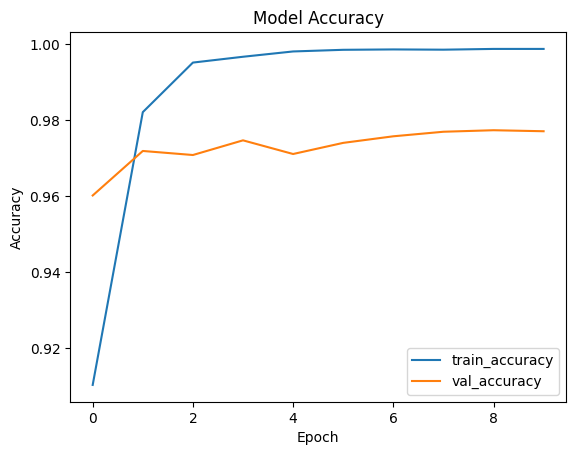

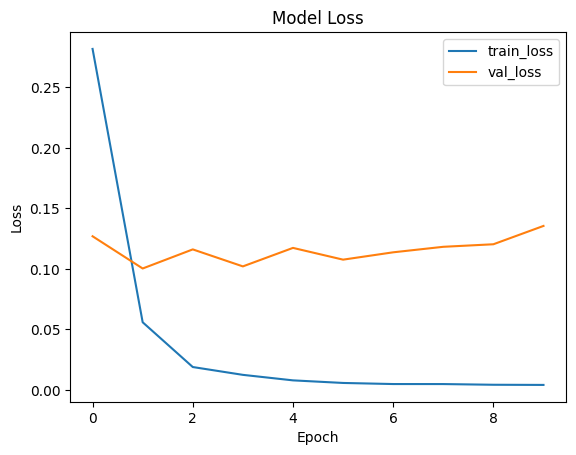

In [36]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluate the model**

**Fit and transform labels in testing set**

In [ ]:
y_test_encoded = label_encoder.fit_transform(y_test)

**Evaluate the model with the encoded labels**

In [37]:
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print("Test Loss (GRU):", loss)
print("Test Accuracy (GRU):", accuracy)

235/235 [==============================] - 2s 9ms/step - loss: 0.1355 - accuracy: 0.9771


**Now let's get a classification report to get overall stats for our model**

In [34]:
y_pred = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_labels, target_names=categories))

235/235 [==============================] - 3s 13ms/step
Classification Report:
                                  precision    recall  f1-score   support

                  بهداشت و سلامت       0.95      0.95      0.95       401
                جغرافیا و مکانها       0.99      0.99      0.99      4319
                    دین و اعتقاد       0.87      0.77      0.82        90
                         ریاضیات       0.76      0.72      0.74        93
فناوری و علوم کاربردی و تکنولوژی       0.95      0.96      0.96      1337
                            ورزش       0.99      0.98      0.99      1275

                        accuracy                           0.98      7515
                       macro avg       0.92      0.89      0.91      7515
                    weighted avg       0.98      0.98      0.98      7515





---



**Now we train our model using LSTM (Long short term memory) and compare the results and plots with GRU.**

In [46]:
from tensorflow.keras.layers import LSTM

**Define our model like previous but this time with LSTM**

In [47]:
model_lstm = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length),
    LSTM(128),
    Dense(len(categories), activation='softmax')
])

In [48]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Now we train our model and assign it to history_lstm to plot it later**

In [49]:
history_lstm = model_lstm.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded))

Epoch 1/10
940/940 [==============================] - 61s 63ms/step - loss: 0.2933 - accuracy: 0.9055 - val_loss: 0.1583 - val_accuracy: 0.9502
Epoch 2/10
940/940 [==============================] - 30s 32ms/step - loss: 0.1160 - accuracy: 0.9648 - val_loss: 0.1606 - val_accuracy: 0.9504
Epoch 3/10
940/940 [==============================] - 28s 30ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.1303 - val_accuracy: 0.9645
Epoch 4/10
940/940 [==============================] - 26s 28ms/step - loss: 0.0276 - accuracy: 0.9927 - val_loss: 0.1277 - val_accuracy: 0.9679
Epoch 5/10
940/940 [==============================] - 24s 25ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.1315 - val_accuracy: 0.9738
Epoch 6/10
940/940 [==============================] - 25s 26ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.1337 - val_accuracy: 0.9706
Epoch 7/10
940/940 [==============================] - 24s 26ms/step - loss: 0.0312 - accuracy: 0.9921 - val_loss: 0.1492 - val_accuracy:

**Plotting the model variables**

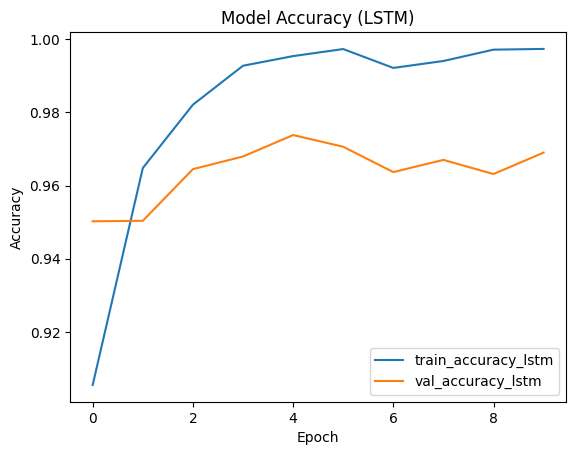

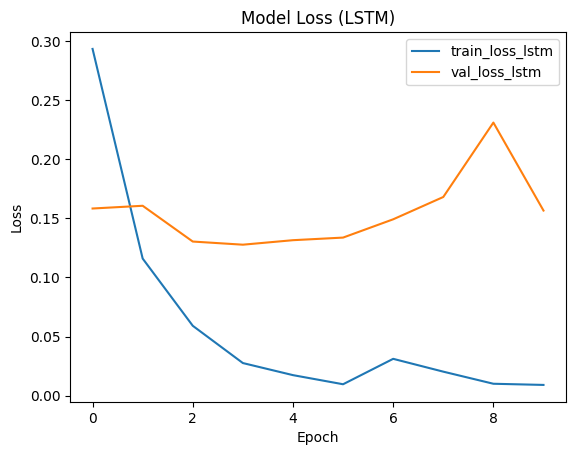

In [50]:
plt.plot(history_lstm.history['accuracy'], label='train_accuracy_lstm')
plt.plot(history_lstm.history['val_accuracy'], label='val_accuracy_lstm')
plt.title('Model Accuracy (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_lstm.history['loss'], label='train_loss_lstm')
plt.plot(history_lstm.history['val_loss'], label='val_loss_lstm')
plt.title('Model Loss (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Function to predict category for input text using LSTM model**

In [51]:
def predict_category_lstm(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model_lstm.predict(padded_sequence)
    predicted_topic_index = np.argmax(prediction)
    predicted_topic = categories[predicted_topic_index]
    return predicted_topic

**Evaluate the LSTM model**

In [52]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test_encoded)
print("Test Loss (LSTM):", loss_lstm)
print("Test Accuracy (LSTM):", accuracy_lstm)

235/235 [==============================] - 3s 11ms/step - loss: 0.1566 - accuracy: 0.9690
Test Loss (LSTM): 0.15655656158924103
Test Accuracy (LSTM): 0.9689953327178955


**Predictions and classification report for LSTM model**

In [53]:
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_labels_lstm = np.argmax(y_pred_lstm, axis=1)
print("Classification Report (LSTM):")
print(classification_report(y_test_encoded, y_pred_labels_lstm, target_names=categories))

235/235 [==============================] - 2s 8ms/step
Classification Report (LSTM):
                                  precision    recall  f1-score   support

                  بهداشت و سلامت       0.92      0.93      0.92       401
                            ورزش       0.99      0.99      0.99      4319
                         ریاضیات       0.78      0.69      0.73        90
                    دین و اعتقاد       0.71      0.68      0.69        93
                جغرافیا و مکانها       0.94      0.94      0.94      1337
فناوری و علوم کاربردی و تکنولوژی       0.98      0.99      0.98      1275

                        accuracy                           0.97      7515
                       macro avg       0.89      0.87      0.88      7515
                    weighted avg       0.97      0.97      0.97      7515

